age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object
32561
True


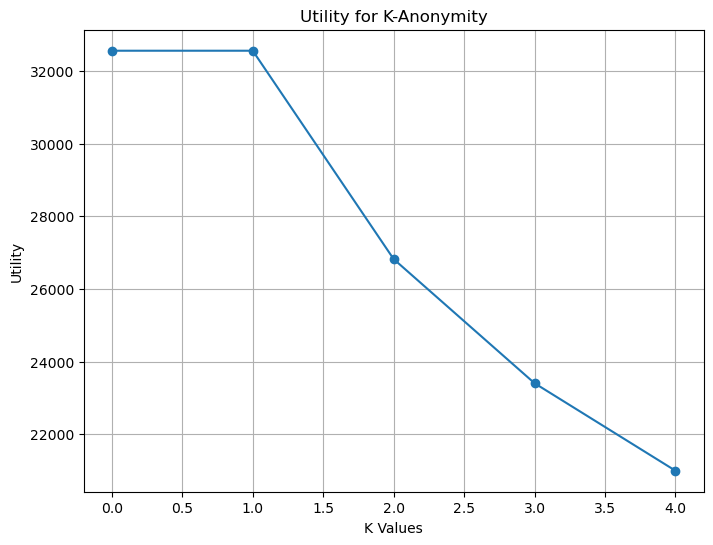

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('adult.csv')
print(df.dtypes)
quasi_identifiers = ["age",
"education",
"marital.status",
"occupation"]
grouped_dataset = df.groupby(quasi_identifiers)
original_sum = len(df[quasi_identifiers])
print(original_sum)
print(original_sum == len(df))
df[quasi_identifiers].value_counts()
def calculate_k_anonymity_count(k):
    count = 0
    for _, group in grouped_dataset:
        group_size = len(group)
        if group_size < k:
            count += group_size
    return count 

def calculate_k_anonymity_utility(original_data, transformed_data):
    utility_metric = np.mean(np.abs(original_data - transformed_data))
    return utility_metric 


# Let's use k-values 2, 5 for demonstration
k_values = np.arange(5)
total_records = len(df)
utility_k_data = []  # Initialize utility_k_data as an empty list
for i in range(len(k_values)):
    anonymized_data = calculate_k_anonymity_count(k_values[i])
    utility_metric = calculate_k_anonymity_utility(total_records,anonymized_data)
    utility_k_data.append(utility_metric)
    
# Create line plots for k-anonymity utility
plt.figure(figsize=(8, 6))
plt.plot(k_values, utility_k_data, marker="o")
plt.xlabel("K Values")
plt.ylabel("Utility")
plt.title("Utility for K-Anonymity")
plt.grid(True)
plt.savefig('Utility k=2 to 5')


plt.show()

Descriptive Statistics of Group Sizes (Before Anonymization):
count    10373.000000
mean         3.139015
std          5.264408
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max         79.000000
Name: group_size_original, dtype: float64
Suggested K value based on 75th percentile (Before Anonymization): 3

Descriptive Statistics of Group Sizes after K-Anonymity (K=2):
count    4636.000000
mean        5.786022
std         7.024656
min         2.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        79.000000
Name: group_size_anonymized, dtype: float64
Anonymized dataset saved to adult_anonymized.csv


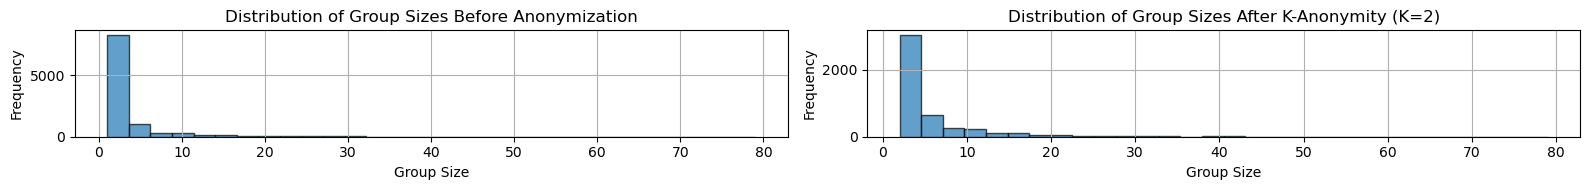

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('adult.csv')
adult=pd.read_csv('adult.csv', na_values=["?"])
def gaussian_mech_RDP_vec(v, sensitivity, alpha, epsilon_bar):
    sigma = np.sqrt((sensitivity**2 * alpha) / (2 * epsilon_bar))
    return v + np.random.normal(loc=0, scale=sigma) 

alpha_values = np.round(np.geomspace(0.001, 25, num=20), 3)

epsilon_bar = 0.001


# Select quasi-identifiers
quasi_identifiers = ["age", "education", "marital.status", "occupation"]

# Grouping and counting records by quasi-identifiers before anonymization
grouped_original = data.groupby(quasi_identifiers).size().reset_index(name='group_size_original')

# Analyze group sizes before anonymization
group_sizes_original = grouped_original['group_size_original']

# Print descriptive statistics of group sizes before anonymization
print("Descriptive Statistics of Group Sizes (Before Anonymization):")
print(group_sizes_original.describe())

# Determine an appropriate K value based on original data (for reference)
K_original = int(group_sizes_original.quantile(0.75))  # 75th percentile of group sizes before anonymization
print(f"Suggested K value based on 75th percentile (Before Anonymization): {K_original}")

# Applying K-Anonymity with K=2
grouped_k_anonymity = data.groupby(quasi_identifiers).filter(lambda x: len(x) >= 2)

# Save the anonymized dataset to a CSV file
anonymized_file_path = 'adult_anonymized.csv'

# Grouping and counting records by quasi-identifiers after anonymization
grouped_anonymized = grouped_k_anonymity.groupby(quasi_identifiers).size().reset_index(name='group_size_anonymized')

# Analyze group sizes after anonymization
group_sizes_anonymized = grouped_anonymized['group_size_anonymized']

# Print descriptive statistics of group sizes after anonymization
print("\nDescriptive Statistics of Group Sizes after K-Anonymity (K=2):")
print(group_sizes_anonymized.describe())
grouped_k_anonymity.to_csv(anonymized_file_path, index=False)
print(f"Anonymized dataset saved to {anonymized_file_path}")
# Plotting combined histograms for comparison
plt.figure(figsize=(16, 2))

# Plot histogram of group sizes before anonymization
plt.subplot(1, 2, 1)
plt.hist(group_sizes_original, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Group Size')
plt.ylabel('Frequency')
plt.title('Distribution of Group Sizes Before Anonymization')
plt.grid(True)

# Plot histogram of group sizes after anonymization
plt.subplot(1, 2, 2)
plt.hist(group_sizes_anonymized, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Group Size')
plt.ylabel('Frequency')
plt.title('Distribution of Group Sizes After K-Anonymity (K=2)')
plt.grid(True)

plt.tight_layout()
plt.savefig('Descriptive_Distribution_after_K_2')
plt.show()


Descriptive Statistics of Group Sizes (Before Anonymization):
count    10373.000000
mean         3.139015
std          5.264408
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max         79.000000
Name: group_size_original, dtype: float64
Suggested K value based on 75th percentile (Before Anonymization): 3

Descriptive Statistics of Group Sizes after K-Anonymity (K=4):
count    2124.000000
mean        9.885593
std         8.743242
min         4.000000
25%         5.000000
50%         7.000000
75%        12.000000
max        79.000000
Name: group_size_anonymized, dtype: float64
Anonymized dataset saved to adult_anonymized.csv


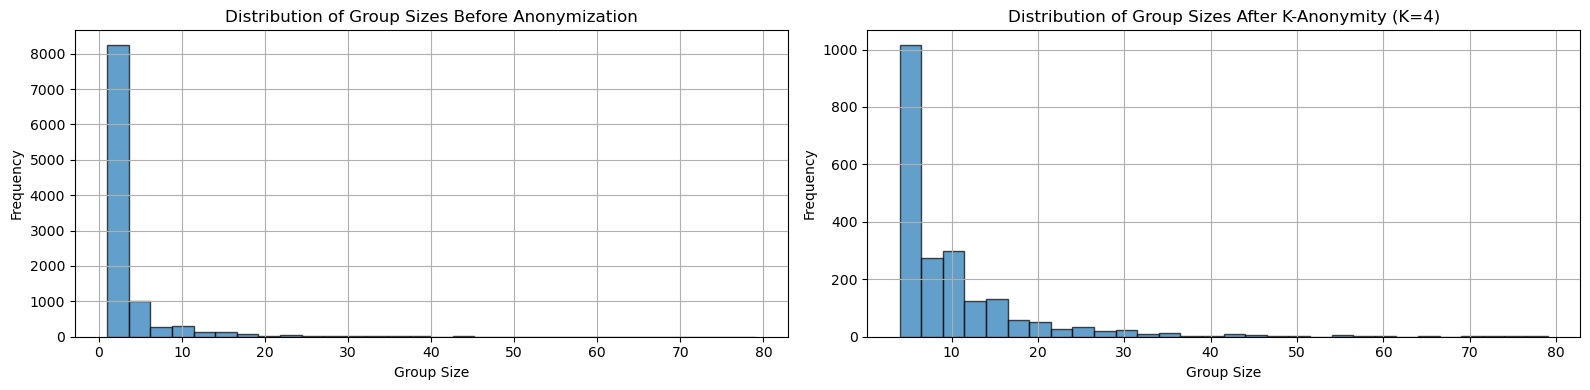

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('adult.csv')
adult=pd.read_csv('adult.csv', na_values=["?"])
def gaussian_mech_RDP_vec(v, sensitivity, alpha, epsilon_bar):
    sigma = np.sqrt((sensitivity**2 * alpha) / (2 * epsilon_bar))
    return v + np.random.normal(loc=0, scale=sigma) 

alpha_values = np.round(np.geomspace(0.001, 25, num=20), 3)

epsilon_bar = 0.1


# Select quasi-identifiers
quasi_identifiers = ["age", "education", "marital.status", "occupation"]

# Grouping and counting records by quasi-identifiers before anonymization
grouped_original = data.groupby(quasi_identifiers).size().reset_index(name='group_size_original')

# Analyze group sizes before anonymization
group_sizes_original = grouped_original['group_size_original']

# Print descriptive statistics of group sizes before anonymization
print("Descriptive Statistics of Group Sizes (Before Anonymization):")
print(group_sizes_original.describe())

# Determine an appropriate K value based on original data (for reference)
K_original = int(group_sizes_original.quantile(0.75))  # 75th percentile of group sizes before anonymization
print(f"Suggested K value based on 75th percentile (Before Anonymization): {K_original}")

# Applying K-Anonymity with K=4
grouped_k_anonymity = data.groupby(quasi_identifiers).filter(lambda x: len(x) >= 4)

# Save the anonymized dataset to a CSV file
anonymized_file_path = 'adult_anonymized.csv'

# Grouping and counting records by quasi-identifiers after anonymization
grouped_anonymized = grouped_k_anonymity.groupby(quasi_identifiers).size().reset_index(name='group_size_anonymized')

# Analyze group sizes after anonymization
group_sizes_anonymized = grouped_anonymized['group_size_anonymized']

# Print descriptive statistics of group sizes after anonymization
print("\nDescriptive Statistics of Group Sizes after K-Anonymity (K=4):")
print(group_sizes_anonymized.describe())
grouped_k_anonymity.to_csv(anonymized_file_path, index=False)
print(f"Anonymized dataset saved to {anonymized_file_path}")
# Plotting combined histograms for comparison
plt.figure(figsize=(16, 4))

# Plot histogram of group sizes before anonymization
plt.subplot(1, 2, 1)
plt.hist(group_sizes_original, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Group Size')
plt.ylabel('Frequency')
plt.title('Distribution of Group Sizes Before Anonymization')
plt.grid(True)

# Plot histogram of group sizes after anonymization
plt.subplot(1, 2, 2)
plt.hist(group_sizes_anonymized, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Group Size')
plt.ylabel('Frequency')
plt.title('Distribution of Group Sizes After K-Anonymity (K=4)')
plt.grid(True)

plt.tight_layout()
plt.savefig('Descriptive_Distribution_after_K_4')
plt.show()


In [ ]:
adult=pd.read_csv('adult.csv', na_values=["?"])

Original Income Counts:
income
<=50K    24720
>50K      7841
Name: count, dtype: int64

Noisy Income Counts:
income
<=50K    24720.630219
>50K      7838.826189
Name: count, dtype: float64
Noisy counts dataset saved to adult_noisy_counts_laplace.csv


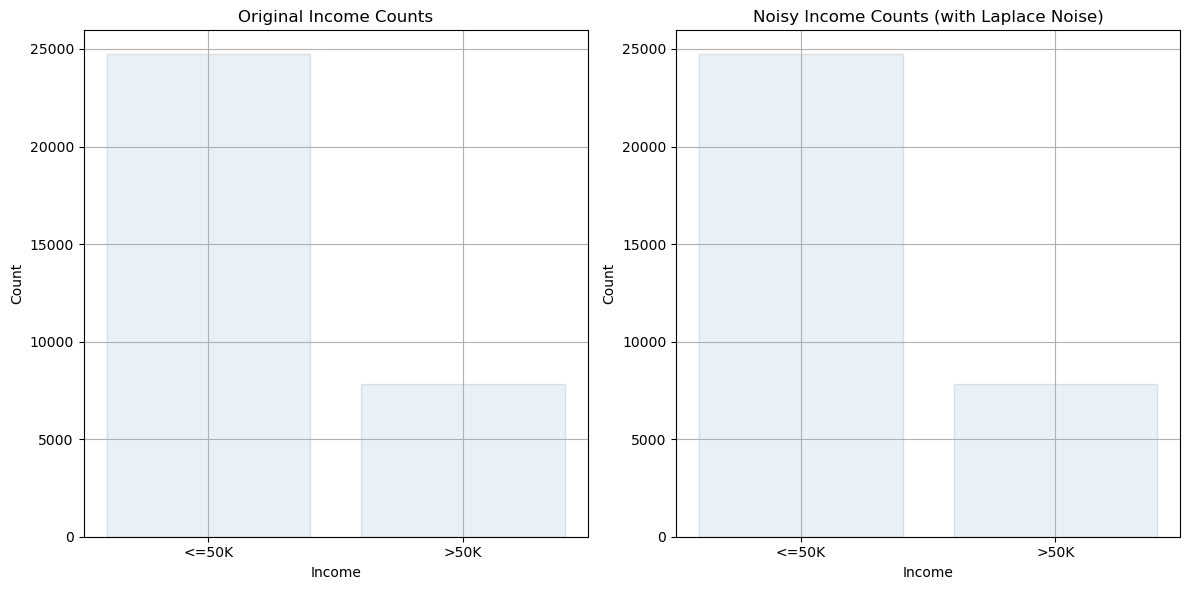

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
data = pd.read_csv('adult.csv')

# Define sensitive column and quasi-identifiers
sensitive_column = "income"  # Assuming 'income' is the sensitive attribute

# Count the occurrences of each income category
income_counts = data[sensitive_column].value_counts().sort_index()
print("Original Income Counts:")
print(income_counts)

# Function to apply Laplace mechanism for differential privacy
def laplace_mech(count, sensitivity, epsilon):
    scale = sensitivity / epsilon
    return count + np.random.laplace(loc=0, scale=scale)

# Parameters for differential privacy
epsilon = 0.1  # Adjust as per your privacy requirements

# Add Laplace noise to the counts
noisy_counts = income_counts.apply(lambda x: laplace_mech(x, 1, epsilon))
print("\nNoisy Income Counts:")
print(noisy_counts)

# Create a new DataFrame with the noisy counts
noisy_data = pd.DataFrame({sensitive_column: noisy_counts.index, 'noisy_count': noisy_counts.values})

# Save the noisy dataset to a CSV file
noisy_file_path = 'adult_noisy_counts_laplace.csv'
noisy_data.to_csv(noisy_file_path, index=False)
print(f"Noisy counts dataset saved to {noisy_file_path}")

# Plotting histograms for comparison
plt.figure(figsize=(12, 6))

# Plot original income counts
plt.subplot(1, 2, 1)
plt.bar(income_counts.index, income_counts.values, edgecolor='black', alpha=0.1)
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Original Income Counts')
plt.grid(True)

# Plot noisy income counts
plt.subplot(1, 2, 2)
plt.bar(noisy_counts.index, noisy_counts.values, edgecolor='black', alpha=0.1)
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Noisy Income Counts (with Laplace Noise)')
plt.grid(True)

plt.tight_layout()
plt.savefig('Income_Distribution_with_Laplace_Noise')
plt.show()


Original Income Values:
income
<=50K    24720
>50K      7841
Name: count, dtype: int64

Noisy Income Values:
income
<=50K    22119
>50K     10442
Name: count, dtype: int64
Anonymized dataset with Randomized Response saved to adult_anonymized_randomized_response.csv


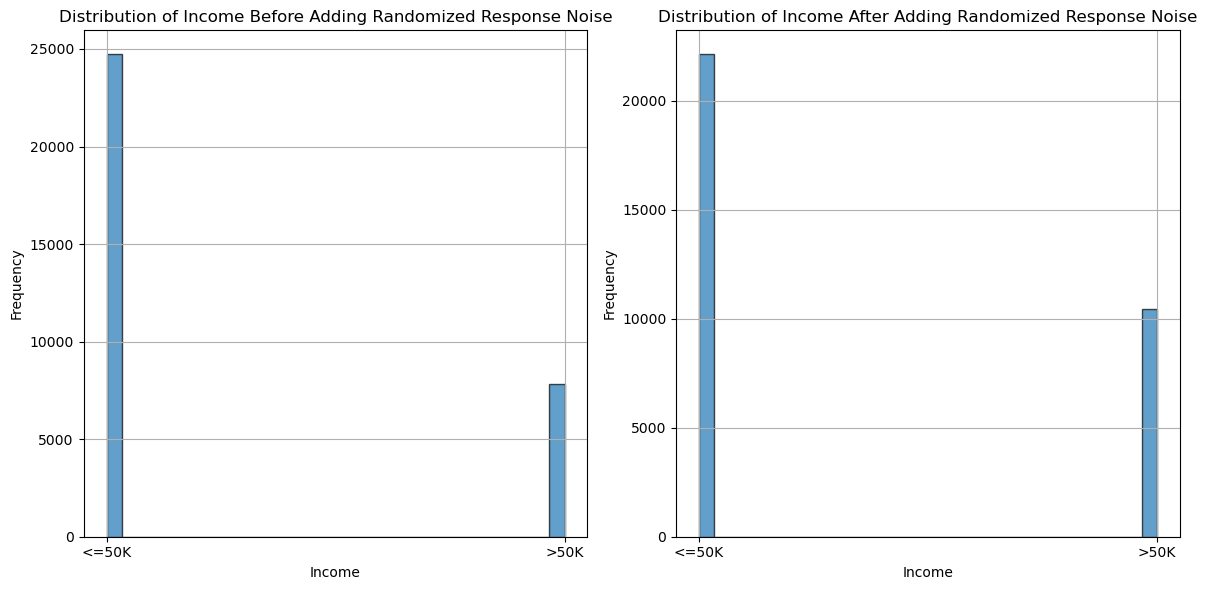

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
data = pd.read_csv('adult.csv')

# Define sensitive column and quasi-identifiers
sensitive_column = "income"  # Assuming 'income' is the sensitive attribute

# Function to apply Randomized Response mechanism for differential privacy
def apply_randomized_response(data, column, epsilon):
    p = np.exp(epsilon) / (1 + np.exp(epsilon))
    noisy_data = data.copy()
    
    # Apply Randomized Response to the specified column
    noisy_data[column] = data[column].apply(lambda x: x if np.random.rand() < p else np.random.choice(data[column].unique()))
    
    return noisy_data

# Parameters for differential privacy
epsilon = 0.8  # Adjust as per your privacy requirements

# Apply Randomized Response to the income column
noisy_data = apply_randomized_response(data, sensitive_column, epsilon)

# Print original and noisy income values
print("Original Income Values:")
print(data[sensitive_column].value_counts())
print("\nNoisy Income Values:")
print(noisy_data[sensitive_column].value_counts())

# Save the anonymized dataset to a CSV file
anonymized_file_path = 'adult_anonymized_randomized_response.csv'
noisy_data.to_csv(anonymized_file_path, index=False)
print(f"Anonymized dataset with Randomized Response saved to {anonymized_file_path}")

# Plotting histograms for comparison
plt.figure(figsize=(12, 6))

# Plot histogram of income before noise
plt.subplot(1, 2, 1)
plt.hist(data[sensitive_column], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Distribution of Income Before Adding Randomized Response Noise')
plt.grid(True)

# Plot histogram of income after noise
plt.subplot(1, 2, 2)
plt.hist(noisy_data[sensitive_column], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Distribution of Income After Adding Randomized Response Noise')
plt.grid(True)

plt.tight_layout()
plt.savefig('Income_Distribution_after_Randomized_Response_Noise')
plt.show()
